In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('challenger-data.csv')

In [3]:
data.head()

,Observation,Y,X
0,1,1,53
1,2,1,53
2,3,1,53
3,4,0,53
4,5,0,53


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Observation  120 non-null    int64
 1   Y            120 non-null    int64
 2   X            120 non-null    int64
dtypes: int64(3)
memory usage: 2.9 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Observation,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
Y,120.0,0.083333,0.277544,0.0,0.00,0.0,0.00,1.0
X,120.0,70.000000,7.100716,53.0,67.00,70.0,75.25,81.0


# Visualizing the Data

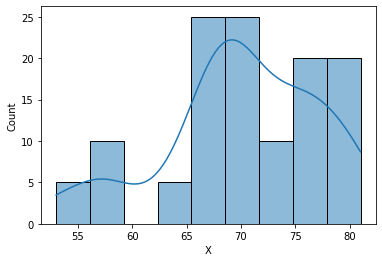

In [8]:
sns.histplot(data['X'], kde = True)
plt.show()

In [11]:
failure = data.loc[data['Y'] == 1]
success = data.loc[data['Y'] == 0]

In [15]:
failure['X'].value_counts()

53    3
70    2
75    2
57    1
58    1
63    1
Name: X, dtype: int64

In [16]:
success['X'].value_counts()

70    18
67    15
76    10
75     8
72     5
80     5
79     5
78     5
73     5
81     5
69     5
68     5
66     5
57     4
63     4
58     4
53     2
Name: X, dtype: int64

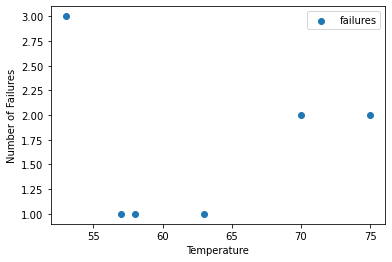

In [20]:
plt.scatter(failure['X'].value_counts().index,failure['X'].value_counts())
plt.xlabel('Temperature')
plt.ylabel('Number of Failures')
plt.legend(['failures', 'No failures'])
plt.show()

###### It seems like when temp is low, there might be higher chance to have failure

# Logistic Regression

In [22]:
import statsmodels.formula.api as sm

In [24]:
# Build the model
model = sm.logit(formula = 'Y~X', data = data)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.242411
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                  0.1549
Time:                        19:45:57   Log-Likelihood:                -29.089
converged:                       True   LL-Null:                       -34.420
Covariance Type:            nonrobust   LLR p-value:                  0.001094
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4049      3.041      2.435      0.015       1.445      13.365
X             -0.1466      0.

###### The negative coefficient of X indicates if the temperation lowers by 1, there is abou 14.7% chance for o-ring failure

###### p-value for both intercept and X are significant statistically to 0-ring failure 